In [70]:
import cogent3
from cogent3 import get_app
import matplotlib.pyplot as plt
import paths
import libs
import pandas as pd

# CDS

I sampled chromosome 22 cds using 
```
eti homologs -i install/ --outdir cds --ref human --coord_names 22 
```
Then I trim stop codons and use a codon alignment model for all the sequences using
```
trim_stops = get_app("trim_stop_codons")
codon_align = get_app("progressive_align", "codon", guide_tree="(Human:0.06,Chimpanzee:0.06,Gorilla:0.1)")
```
I store the aligned sequences in the folder cds/codon_aligned/

In [110]:
folder_in = paths.DATA_APES114 + 'cds/codon_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           345
not_completed        51
logs                  1
-----------------------


Load cds data

In [111]:
loader = get_app("load_aligned", moltype="dna")   
omit_degs_cds = get_app("omit_degenerates", moltype="dna", motif_length=3)
concat = get_app("concat", moltype="dna")

#create a concatenated alignment with all coding positions
cdsall_process = loader + omit_degs_cds
# result below is only valid alignments (no NotCompleted).
results_cdsall = [r for r in cdsall_process.as_completed(in_dstore[:], parallel=True) if r]
cdsall_alns = concat(results_cdsall)
cdsall_alns.source = "cds_alignments"
cdsall_alns

   0%|          |00:00<?

,0
Chimpanzee,ATGGAGGTGGCTGAATTAGGCTTCCCAGAGACTGCAGTGTCCCAATCCAGGATCTGTCTA
Gorilla,............................................................
Human,............................................................


Perform a General Nucleotide substitution model spliting codon positions.

In [105]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm_cds = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True, split_codons=True)
result_allpos = sm_cds(cdsall_alns)

lengthstree_pos1 = result_allpos[1].get_lengths_as_ens()
humanENS_pos1 = lengthstree_pos1['Human']

lengthstree_pos2 = result_allpos[2].get_lengths_as_ens()
humanENS_pos2 = lengthstree_pos2['Human']

lengthstree_pos3 = result_allpos[3].get_lengths_as_ens()
humanENS_pos3 = lengthstree_pos3['Human']

print("Distances: ")
print(lengthstree_pos1)
print(lengthstree_pos2)
print(lengthstree_pos3)

result_allpos.lf

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.005461408238888854), 'Gorilla': np.float64(0.006196984988734236), 'Human': np.float64(0.0032511520549477722)}
{'Chimpanzee': np.float64(0.00519279789931257), 'Gorilla': np.float64(0.0056458063450566575), 'Human': np.float64(0.0026865588017031474)}
{'Chimpanzee': np.float64(0.009903353142050878), 'Gorilla': np.float64(0.013925524474993144), 'Human': np.float64(0.007407091014907923)}


OrderedDict([(1,
              GN pos-1
              log-likelihood = -264487.7594
              number of free parameters = 39
              edge          parent    length     A>C     A>G     A>T     C>A     C>G
              ----------------------------------------------------------------------
              Chimpanzee    root        0.01    1.19    2.17    0.88    1.18    1.17
              Gorilla       root        0.01    1.69    2.80    0.94    1.41    1.83
              Human         root        0.00    1.54    4.68    0.84    1.68    2.24
              ----------------------------------------------------------------------
              
              continued: 
               C>T     G>A     G>C     G>T     T>A     T>C
              --------------------------------------------
              1.88    2.61    1.67    0.85    0.86    1.85
              3.35    3.96    1.77    1.39    0.88    3.22
              4.49    5.53    1.21    1.16    1.92    2.30
              -----------

In [112]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm_cds = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_cdsall = sm_cds(cdsall_alns)

lengthstree_cdsall = result_cdsall.lf.get_lengths_as_ens()
humanENS_cdsall = lengthstree_cdsall['Human']

print("Distances: ")
print(lengthstree_cdsall)

result_cdsall.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.006845843763419967), 'Gorilla': np.float64(0.008566213474020343), 'Human': np.float64(0.004440725103723248)}


GN
log-likelihood = -817632.5312
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    0.99    2.08    0.76    0.87    1.20
Gorilla       root        0.01    1.22    3.24    0.79    1.18    1.64
Human         root        0.00    1.17    4.05    0.62    1.43    1.74
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
3.24    2.83    1.41    0.92    0.64    2.30
5.13    4.57    1.69    1.32    0.69    3.76
7.54    6.41    1.46    1.15    0.83    3.59
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.23    0.30    0.29    0.19
----------------------------

Perform a CpG substitution model using all cds positions.

In [ ]:
cdsall_alns_forCpG = cdsall_alns.omit_gap_pos(motif_length=2, allowed_gap_frac=0.0)

#di_cpg defines a standard assymmetric dinucleotide model
di_cpg = get_app("model", libs.GDN_CpG(), time_het="max", show_progress=True, optimise_motif_probs=True)
result_cdsCpG = di_cpg(cdsall_alns_forCpG)

lengthstree_cdsCpG = result_cdsCpG.lf.get_lengths_as_ens()
humanENS_cdsCpG = lengthstree_cdsCpG["Human"]/2

print("Distances: ")
print(lengthstree_cdsCpG)

result_cdsCpG.lf

/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/cogent3/recalculation/definition.py:690: UserWarning: using slow exponentiator because 'eigen failed precision test'
  return func(*args)


   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.013713074337357276), 'Gorilla': np.float64(0.017177905303348787), 'Human': np.float64(0.008896662156281961)}


GDN_CpG
log-likelihood = -808033.6982
number of free parameters = 57
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    0.99    2.07    0.76    0.87    1.20
Gorilla       root        0.02    1.21    3.22    0.78    1.18    1.63
Human         root        0.01    1.17    4.01    0.62    1.43    1.74
----------------------------------------------------------------------

continued: 
==============================================================
 C>T    CG>CA    CG>TG     G>A     G>C     G>T     T>A     T>C
--------------------------------------------------------------
2.66     4.02     4.03    2.30    1.41    0.91    0.64    2.28
3.95     3.76     5.00    3.77    1.69    1.32    0.69    3.74
5.92     4.43     4.72    5.08    1.46    1.14    0.82    3.50
--------------------------------------------------------------

============================================================================
  AA      AC      AG      AT      CA      CC      CG      CT      GA      GC
----------------------------------------------------------------------------
0.05    0.06    0.08    0.04    0.08    0.10    0.05    0.07    0.07    0.09
----------------------------------------------------------------------------

continued: 
============================================
  GG      GT      TA      TC      TG      TT
--------------------------------------------
0.09    0.04    0.02    0.06    0.08    0.03
--------------------------------------------

Load ffold positions from cds alignments

In [108]:
loader = get_app("load_aligned", moltype="dna")   
omit_degs_cds = get_app("omit_degenerates", moltype="dna", motif_length=3)
ffold = get_app("take_codon_positions", fourfold_degenerate=True)
concat = get_app("concat", moltype="dna")

#create a concatenated alignment with all coding positions
ffold_process = loader + omit_degs_cds + ffold
# result below is only valid alignments (no NotCompleted).
results_ffold = [r for r in ffold_process.as_completed(in_dstore[:], parallel=True) if r]
ffold_alns = concat(results_ffold)
ffold_alns.source = "cds_alignments"

ffold_alns

   0%|          |00:00<?

Exception ignored in: <function tqdm.__del__ at 0x7f9cd811b060>
Traceback (most recent call last):
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/std.py", line 1148, in __del__
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/notebook.py", line 282, in close
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/notebook.py", line 171, in display
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 716, in __set__
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 706, in set
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 1513, in _notify_trait
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/ipywidgets/widgets/widget.py", line 700, in notify_change
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/si

,0
Chimpanzee,GGCCCGGCCCCCGGAGCGGGACGTGCAGGAGACGGCGCGGCAGGCGCGGGCCCGAGGCGC
Gorilla,............................................................
Human,............................................................


Perfrom a GN substitution model on ffold positions

In [109]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_ffold = sm(ffold_alns)

lengthstree_ffold = result_ffold.lf.get_lengths_as_ens()
humanENS_ffold = lengthstree_ffold["Human"]

print("Distances: ")
print(lengthstree_ffold)

result_ffold.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.008145821156784663), 'Gorilla': np.float64(0.014230384753035372), 'Human': np.float64(0.007866039389016853)}


GN
log-likelihood = -131955.0316
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    1.54    5.64    1.03    1.09    1.90
Gorilla       root        0.01    0.79    4.67    0.51    0.74    1.09
Human         root        0.01    1.06    4.01    0.39    0.78    0.97
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
8.29    9.78    1.50    1.71    1.00    6.22
4.15    5.22    1.43    0.90    0.39    4.05
5.22    6.17    1.18    0.84    0.31    2.71
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.15    0.38    0.31    0.16
----------------------------

# Introns

I sampled chromosome 22 introns masking ancestral repeats and cds using 
```
eti alignments -i install -od introns --align_name 10_primates* --ref human --mask cds_allAR_1column.txt --coord_names 22 
```
where cds_allAR_1column.txt is a list containing all the biotypes for ancestral repeats and cds

In [45]:
folder_in = paths.DATA_APES114 + 'introns/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           543
not_completed         0
logs                  1
-----------------------


In [46]:
#loading and cocatanating sequences
loader = get_app("load_aligned", moltype="dna")
omit_degs_noncds = get_app("omit_degenerates", moltype="dna")
rename_noncds = libs.renamer_noncds_aligned()
concat = get_app("concat", moltype="dna")

noncds_app = loader + omit_degs_noncds + rename_noncds
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in noncds_app.as_completed(in_dstore[:], parallel=True) if r]
alns_introns = concat(results_allpos)
alns_introns.source = "introns_alignments"
alns_introns

   0%|          |00:00<?

,0
Chimpanzee,TAGAAAGAAAAGCAAGCTAGGCTGACTCTCCTGGCGGAAGGATGACTGGAGGGGGTGGGC
Gorilla,......................................................A.....
Human,.......G...........................A...............C........


In [48]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_introns = sm(alns_introns)

lengthstree_introns = result_introns.lf.get_lengths_as_ens()
humanENS_intron = lengthstree_introns["Human"]

print("Distances: ")
print(lengthstree_introns)

result_introns.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.0060670510569977125), 'Gorilla': np.float64(0.00992437850201705), 'Human': np.float64(0.005807748192445503)}


GN
log-likelihood = -10543588.5646
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    0.98    3.66    0.61    1.02    1.51
Gorilla       root        0.01    1.01    4.67    0.64    1.17    1.64
Human         root        0.01    1.03    4.06    0.60    1.16    1.52
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
6.01    6.10    1.39    1.03    0.60    3.43
6.45    6.52    1.65    1.16    0.65    4.58
6.76    6.79    1.55    1.20    0.59    4.01
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

In [50]:
totalENS_introns = result_introns.total_length(length_as="ENS")
totalENS_introns

np.float64(0.021799177751460265)

In [49]:
#Do a CpG substitution model
alns_introns_forCpG = alns_introns.omit_gap_pos(motif_length=2, allowed_gap_frac=0.0)

di_cpg = get_app("model", libs.GDN_CpG(), time_het="max", show_progress=True, optimise_motif_probs=True)
result_intronsCpG = di_cpg(alns_introns_forCpG)

lengthstree_intronsCpG = result_intronsCpG.lf.get_lengths_as_ens()
humanENS_intronCpG = lengthstree_intronsCpG["Human"]/2

print("Distances: ")
print(lengthstree_intronsCpG)

result_intronsCpG.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.012200733868499836), 'Gorilla': np.float64(0.0199848629009894), 'Human': np.float64(0.011677762400722193)}


GDN_CpG
log-likelihood = -10380243.3228
number of free parameters = 57
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    0.98    3.59    0.61    1.01    1.51
Gorilla       root        0.02    1.01    4.63    0.64    1.16    1.64
Human         root        0.01    1.03    3.97    0.60    1.16    1.52
----------------------------------------------------------------------

continued: 
==============================================================
 C>T    CG>CA    CG>TG     G>A     G>C     G>T     T>A     T>C
--------------------------------------------------------------
4.83     8.63     9.06    4.95    1.39    1.02    0.60    3.35
5.22     8.88     8.56    5.24    1.64    1.15    0.64    4.53
5.44     8.67     8.95    5.51    1.55    1.19    0.59    3.92
--------------------------------------------------------------

============================================================================
  AA      AC      AG      AT      CA      CC      CG      CT      GA      GC
----------------------------------------------------------------------------
0.07    0.05    0.08    0.05    0.08    0.08    0.02    0.08    0.06    0.06
----------------------------------------------------------------------------

continued: 
============================================
  GG      GT      TA      TC      TG      TT
--------------------------------------------
0.08    0.05    0.04    0.06    0.08    0.07
--------------------------------------------

# Intron AR sample alignment

I sampled chromosome 22 introns masking everythin but ancestral repeats using 
```
eti alignments -i install -od intronsAR --align_name 10_primates* --ref human --mask_shadow ancestralrepeats_1column.txt --coord_names 22 
```
where ancestralrepeats_1column.txt is a list containing the ancestral repeats biotypes: 
Type I Transposons/LINE,
Type I Transposons/SINE,
Type II Transposons,
LTRs

In [51]:
folder_in = paths.DATA_APES114 + 'intronsAR/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           553
not_completed         0
logs                  1
-----------------------


In [52]:
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in noncds_app.as_completed(in_dstore[:], parallel=True) if r]
alns_intronsAR = concat(results_allpos)
alns_intronsAR.source = "intronsAR_alignments"
alns_intronsAR

   0%|          |00:00<?

,0
Chimpanzee,CTCTGCCCTCACCAGCTGTGTGACCCGAGCACACCCTACTCCTGGGCCTCAGCCCCTTCC
Gorilla,..........................A.................................
Human,............................................................


In [53]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intronsAR = sm(alns_intronsAR)

lengthstree_intronsAR = result_intronsAR.lf.get_lengths_as_ens()
humanENS_intronAR = lengthstree_intronsAR["Human"]

print("Distances: ")
print(lengthstree_intronsAR)

result_intronsAR.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.0071866424751089635), 'Gorilla': np.float64(0.012073279508521752), 'Human': np.float64(0.006579165206747283)}


GN
log-likelihood = -8471315.4296
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    1.06    3.64    0.87    1.16    1.42
Gorilla       root        0.01    0.99    4.45    0.80    1.21    1.46
Human         root        0.01    0.99    3.83    0.71    1.21    1.50
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
7.40    7.40    1.36    1.21    0.81    3.51
6.77    6.95    1.43    1.16    0.78    4.33
7.53    7.70    1.35    1.25    0.72    3.84
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.26    0.24    0.24    0.26
----------------------------

In [54]:
totalENS_intronsAR = result_intronsAR.total_length(length_as="ENS")
totalENS_intronsAR

np.float64(0.025839087190377998)

In [55]:
#Do a CpG substitution model
alns_intronsAR_forCpG = alns_intronsAR.omit_gap_pos(motif_length=2, allowed_gap_frac=0.0)

di_cpg = get_app("model", libs.GDN_CpG(), time_het="max", show_progress=True, optimise_motif_probs=True)
result_intronsARCpG = di_cpg(alns_intronsAR_forCpG)

lengthstree_intronsARCpG = result_intronsARCpG.lf.get_lengths_as_ens()
humanENS_intronARCpG = lengthstree_intronsARCpG["Human"]/2

print("Distances: ")
print(lengthstree_intronsARCpG)

result_intronsARCpG.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.01452173978443069), 'Gorilla': np.float64(0.02436359246638132), 'Human': np.float64(0.01329786637155676)}


GDN_CpG
log-likelihood = -8358446.9661
number of free parameters = 57
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    1.06    3.50    0.86    1.15    1.42
Gorilla       root        0.02    0.99    4.37    0.79    1.20    1.46
Human         root        0.01    0.99    3.66    0.71    1.20    1.50
----------------------------------------------------------------------

continued: 
==============================================================
 C>T    CG>CA    CG>TG     G>A     G>C     G>T     T>A     T>C
--------------------------------------------------------------
5.73    10.55    10.12    5.68    1.36    1.20    0.81    3.39
5.29     9.78     9.42    5.38    1.43    1.15    0.77    4.26
5.83    10.64    10.21    5.91    1.35    1.25    0.71    3.69
--------------------------------------------------------------

============================================================================
  AA      AC      AG      AT      CA      CC      CG      CT      GA      GC
----------------------------------------------------------------------------
0.08    0.05    0.08    0.06    0.08    0.07    0.02    0.08    0.06    0.06
----------------------------------------------------------------------------

continued: 
============================================
  GG      GT      TA      TC      TG      TT
--------------------------------------------
0.07    0.05    0.05    0.06    0.08    0.08
--------------------------------------------

# Intergenic sample alignment

I sampled chromosome 22 intergenic masking ancestral repeats and cds using 
```
eti alignments -i install -od intergenic --align_name 10_primates* --ref human --mask allAR_1column.txt --ref_coords chrom22-intergenic.tsv
```

where cds_allAR_1column.txt is the same as discussed in the intron section.

chrom22-intragenic.tsv is a table with intergenic regions coordinates. The instructions to make this table are discussed in "location_inter_intragenic.ipynb"


In [81]:
folder_in = paths.DATA_APES114 + 'intergenic/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           706
not_completed         0
logs                  1
-----------------------


In [82]:
#By using this renamer_aligned function I throw away sequences with paralogs
results_inter = [r for r in noncds_app.as_completed(in_dstore[:], parallel=True) if r]
alns_inter = concat(results_inter)
alns_inter.source = "intergenic_alignments"
alns_inter

   0%|          |00:00<?

Exception ignored in: <function tqdm.__del__ at 0x7f9cd811b060>
Traceback (most recent call last):
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/std.py", line 1148, in __del__
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/notebook.py", line 282, in close
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/notebook.py", line 171, in display
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 716, in __set__
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 706, in set
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 1513, in _notify_trait
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/ipywidgets/widgets/widget.py", line 700, in notify_change
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/si

,0
Chimpanzee,ACAGAACAGACTAGAACCTCCCCGGCCGCTGGCTCCTCCCACACAACGGTCTCGTGACCT
Gorilla,..........................................C.................
Human,..........................................C.................


In [83]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intergenic = sm(alns_inter)

lengthstree_intergenic = result_intergenic.lf.get_lengths_as_ens()
humanENS_inter = lengthstree_intergenic["Human"]

print("Distances: ")
print(lengthstree_intergenic)

result_intergenic.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.007611659725820378), 'Gorilla': np.float64(0.01178540476370694), 'Human': np.float64(0.007351089059293574)}


GN
log-likelihood = -2982321.1610
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    0.98    3.69    0.66    1.12    1.48
Gorilla       root        0.01    0.95    4.33    0.67    1.18    1.52
Human         root        0.01    1.07    4.01    0.70    1.30    1.60
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
5.70    5.73    1.44    1.08    0.68    3.38
6.09    6.13    1.53    1.22    0.64    4.29
6.30    6.56    1.46    1.31    0.63    4.02
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.24    0.26    0.26    0.24
----------------------------

In [62]:
totalENS_intergenic = result_intergenic.total_length(length_as="ENS")
totalENS_intergenic

np.float64(0.026748149033786712)

In [63]:
#Do a CpG substitution model
alns_inter_forCpG = alns_inter.omit_gap_pos(motif_length=2, allowed_gap_frac=0.0)

di_cpg = get_app("model", libs.GDN_CpG(), time_het="max", show_progress=True, optimise_motif_probs=True)
result_interCpG = di_cpg(alns_inter_forCpG)

lengthstree_interCpG = result_interCpG.lf.get_lengths_as_ens()
humanENS_interCpG = lengthstree_interCpG["Human"]/2

print("Distances: ")
print(lengthstree_interCpG)

result_interCpG.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.015340489386102264), 'Gorilla': np.float64(0.02377323134972474), 'Human': np.float64(0.01479353488636966)}


GDN_CpG
log-likelihood = -2931918.0110
number of free parameters = 57
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.02    0.98    3.59    0.65    1.11    1.48
Gorilla       root        0.02    0.95    4.27    0.67    1.17    1.52
Human         root        0.01    1.07    3.91    0.70    1.29    1.59
----------------------------------------------------------------------

continued: 
==============================================================
 C>T    CG>CA    CG>TG     G>A     G>C     G>T     T>A     T>C
--------------------------------------------------------------
4.46     8.38    10.17    4.67    1.44    1.07    0.68    3.29
4.80     9.12     9.63    4.87    1.52    1.20    0.63    4.24
5.11     8.57     8.67    5.32    1.46    1.30    0.62    3.88
--------------------------------------------------------------

============================================================================
  AA      AC      AG      AT      CA      CC      CG      CT      GA      GC
----------------------------------------------------------------------------
0.06    0.05    0.08    0.05    0.08    0.09    0.02    0.08    0.06    0.06
----------------------------------------------------------------------------

continued: 
============================================
  GG      GT      TA      TC      TG      TT
--------------------------------------------
0.08    0.05    0.04    0.06    0.08    0.06
--------------------------------------------

# Intergenic AR sample alignment

I sampled chromosome 22 intergenic regions masking everything but ancestral repeats using 
```
eti alignments -i install -od intragenicAR --align_name 10_primates* --ref human --mask_shadow ancestralrepeats_1column.txt --ref_coords chrom22-intragenic.tsv
```

where ancestralrepeats_1column.txt is the same as discussed in the introns AR section and chrom22-intragenic.tsv is the same as discussed in the intergenic section.

In [84]:
folder_in = paths.DATA_APES114 + 'intergenicAR/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           701
not_completed         0
logs                  1
-----------------------


In [85]:
#By using this renamer_aligned function I throw away sequences with paralogs
results_interAR = [r for r in noncds_app.as_completed(in_dstore[:], parallel=True) if r]
alns_interAR = concat(results_interAR)
alns_interAR.source = "intergenicAR_alignments"
alns_interAR

   0%|          |00:00<?

,0
Chimpanzee,TTTTTTGTTTTTTTTTTGAGACAGGGCCTCGCTTTGTCACTCAGGTTTGAGTCCAGTGGC
Gorilla,...G..T...................T.................................
Human,............................................................


In [86]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intergenicAR = sm(alns_interAR)

lengthstree_intergenicAR = result_intergenicAR.lf.get_lengths_as_ens()
humanENS_interAR = lengthstree_intergenicAR["Human"]

print("Distances: ")
print(lengthstree_intergenicAR)

result_intergenicAR.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.008387219747459793), 'Gorilla': np.float64(0.012639652376762683), 'Human': np.float64(0.007596075081228134)}


GN
log-likelihood = -3638201.6185
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    1.04    3.52    0.89    1.19    1.42
Gorilla       root        0.01    0.93    4.27    0.66    1.22    1.41
Human         root        0.01    0.97    3.95    0.81    1.38    1.47
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
6.61    6.55    1.46    1.23    0.82    3.56
6.59    6.62    1.41    1.31    0.76    3.98
6.99    7.05    1.42    1.35    0.71    3.77
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.26    0.23    0.23    0.27
----------------------------

In [69]:
totalENS_intergenicAR = result_intergenicAR.total_length(length_as="ENS")
totalENS_intergenicAR

np.float64(0.0286229543912844)

In [68]:
#Do a CpG substitution model
alns_interAR_forCpG = alns_interAR.omit_gap_pos(motif_length=2, allowed_gap_frac=0.0)

di_cpg = get_app("model", libs.GDN_CpG(), time_het="max", show_progress=True, optimise_motif_probs=True)
result_interARCpG = di_cpg(alns_interAR_forCpG)

lengthstree_interARCpG = result_interARCpG.lf.get_lengths_as_ens()
humanENS_interARCpG = lengthstree_interARCpG["Human"]/2

print("Distances: ")
print(lengthstree_interARCpG)

result_interARCpG.lf

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.016920146448353723), 'Gorilla': np.float64(0.025541629872322308), 'Human': np.float64(0.015365642265580078)}


GDN_CpG
log-likelihood = -3588815.3691
number of free parameters = 57
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.02    1.04    3.39    0.88    1.18    1.42
Gorilla       root        0.03    0.93    4.20    0.66    1.21    1.41
Human         root        0.02    0.97    3.80    0.81    1.38    1.46
----------------------------------------------------------------------

continued: 
==============================================================
 C>T    CG>CA    CG>TG     G>A     G>C     G>T     T>A     T>C
--------------------------------------------------------------
5.22    10.21    10.25    5.19    1.46    1.23    0.81    3.43
5.19    10.67    10.10    5.15    1.41    1.29    0.75    3.92
5.58    10.76    10.04    5.52    1.42    1.34    0.71    3.63
--------------------------------------------------------------

============================================================================
  AA      AC      AG      AT      CA      CC      CG      CT      GA      GC
----------------------------------------------------------------------------
0.08    0.05    0.07    0.06    0.08    0.07    0.02    0.08    0.06    0.06
----------------------------------------------------------------------------

continued: 
============================================
  GG      GT      TA      TC      TG      TT
--------------------------------------------
0.07    0.05    0.05    0.06    0.08    0.08
--------------------------------------------

# Plotting

Text(0, 0.5, 'Constraint')

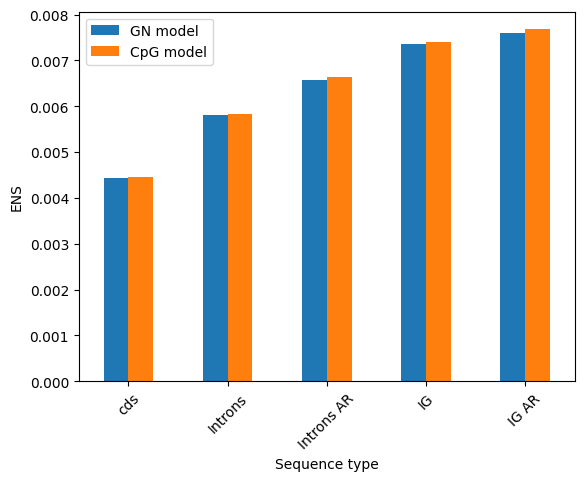

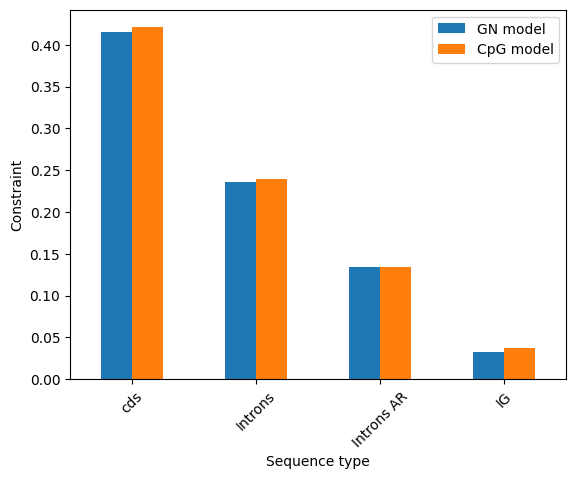

In [100]:
ENS_data = pd.DataFrame([
    ['cds', humanENS_cdsall, humanENS_cdsCpG],
    ['Introns', humanENS_intron, humanENS_intronCpG],
    ['Introns AR', humanENS_intronAR, humanENS_intronARCpG],
    ['IG', humanENS_inter, humanENS_interCpG],
    ['IG AR', humanENS_interAR, humanENS_interARCpG]
    ],
    columns = ['Sequence type', 'GN model', 'CpG model'])

Constraint_data = pd.DataFrame([
    ['cds', 1.0-humanENS_cdsall/humanENS_interAR, 1.0-humanENS_cdsCpG/humanENS_interARCpG],
    ['Introns', 1.0-humanENS_intron/humanENS_interAR, 1.0-humanENS_intronCpG/humanENS_interARCpG],
    ['Introns AR', 1.0-humanENS_intronAR/humanENS_interAR, 1.0-humanENS_intronARCpG/humanENS_interARCpG],
    ['IG', 1.0-humanENS_inter/humanENS_interAR, 1.0-humanENS_interCpG/humanENS_interARCpG]
    ],
    columns = ['Sequence type', 'GN model', 'CpG model'])

ENS_data.plot(x='Sequence type',
    kind = 'bar',
    rot=45,
    stacked=False)
plt.ylabel('ENS')

Constraint_data.plot(x='Sequence type',
    kind = 'bar',
    rot=45,
    stacked=False)
plt.ylabel('Constraint')


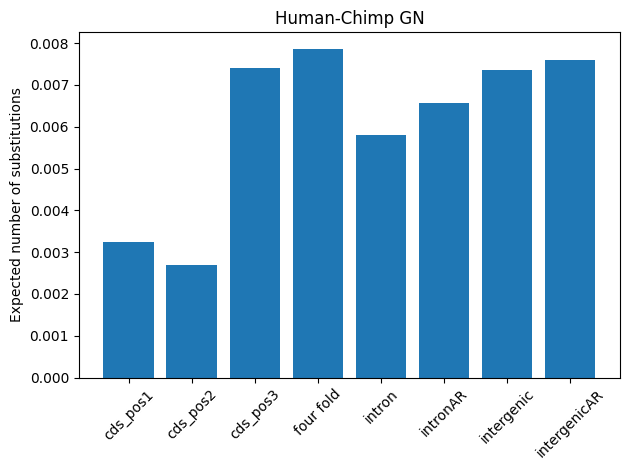

{'cds_pos1': np.float64(0.003251149462232993), 'cds_pos2': np.float64(0.002686558727043541), 'cds_pos3': np.float64(0.00740709327294607), 'four fold': np.float64(0.00786603922059718), 'intron': np.float64(0.005807745685846278), 'intronAR': np.float64(0.00657916228259738), 'intergenic': np.float64(0.00735108565289763), 'intergenicAR': np.float64(0.007596075345045794)}


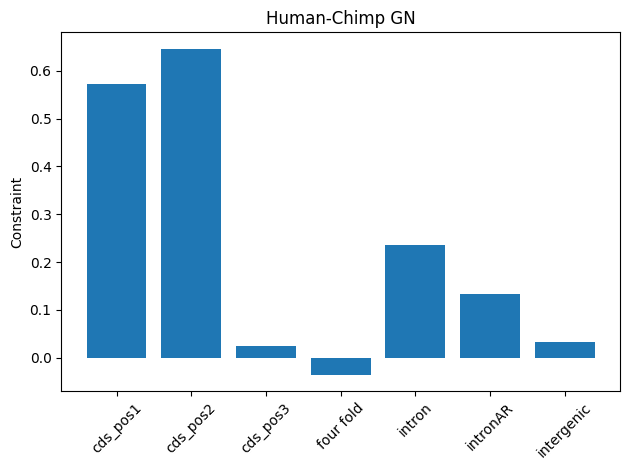

{'cds_pos1': np.float64(0.5719961539937315),
 'cds_pos2': np.float64(0.6463227910455456),
 'cds_pos3': np.float64(0.024878909636274038),
 'four fold': np.float64(-0.035539915454821935),
 'intron': np.float64(0.23542810964426197),
 'intronAR': np.float64(0.13387348285212186),
 'intergenic': np.float64(0.03225214087797945)}

In [30]:
ENS_human_GN = {
    "cds_pos1": humanENS_pos1,
    "cds_pos2": humanENS_pos2,
    "cds_pos3": humanENS_pos3,
    "four fold": humanENS_ffold,
    "intron": humanENS_intron,
    "intronAR": humanENS_intronAR,
    "intergenic": humanENS_intergenic,
    "intergenicAR": humanENS_intergenicAR

}

constraint_GN = {
    "cds_pos1": 1-humanENS_pos1/humanENS_intergenicAR,
    "cds_pos2": 1-humanENS_pos2/humanENS_intergenicAR,
    "cds_pos3": 1-humanENS_pos3/humanENS_intergenicAR,
    "four fold": 1-humanENS_ffold/humanENS_intergenicAR,
    "intron": 1-humanENS_intron/humanENS_intergenicAR,
    "intronAR": 1-humanENS_intronAR/humanENS_intergenicAR,
    "intergenic": 1-humanENS_intergenic/humanENS_intergenicAR
}

plt.figure()
plt.bar(ENS_human_GN.keys(), ENS_human_GN.values())
plt.ylabel("Expected number of substitutions")
plt.title("Human-Chimp GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(ENS_human_GN)

plt.figure()
plt.bar(constraint_GN.keys(), constraint_GN.values())
plt.ylabel("Constraint")
plt.title("Human-Chimp GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

constraint_GN

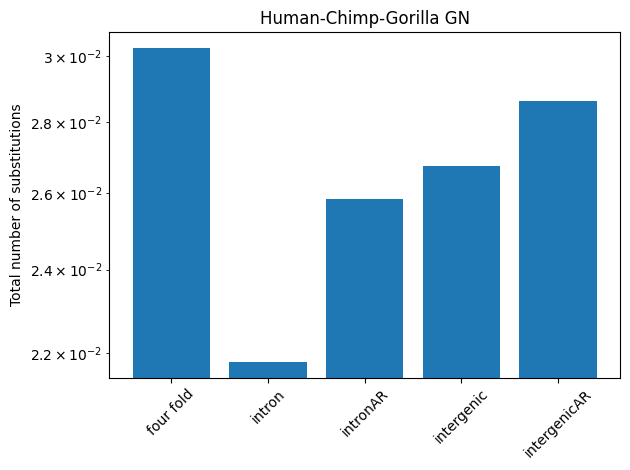

{'four fold': np.float64(0.030242240933041845), 'intron': np.float64(0.02179917548469741), 'intronAR': np.float64(0.025839089841548334), 'intergenic': np.float64(0.026748146830253994), 'intergenicAR': np.float64(0.028622952406617067)}


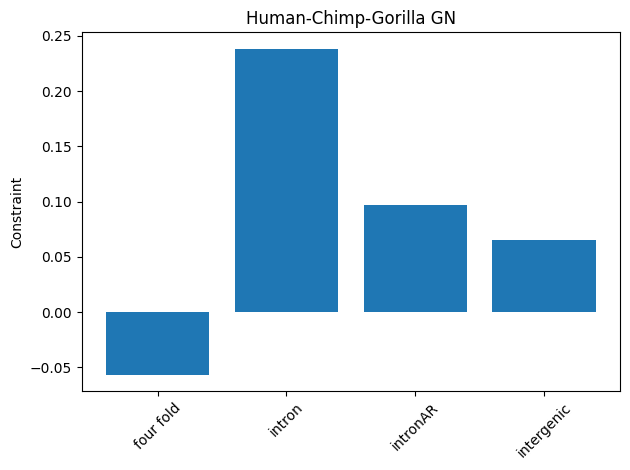

{'four fold': np.float64(-0.05657307825626101),
 'intron': np.float64(0.23840227328687913),
 'intronAR': np.float64(0.09725979785457628),
 'intergenic': np.float64(0.06550007664232615)}

In [ ]:
totalENS_human_GN = {
    "four fold": totalENS_ffold,
    "intron": totalENS_introns,
    "intronAR": totalENS_intronsAR,
    "intergenic": totalENS_intergenic,
    "intergenicAR": totalENS_intergenicAR
}

totalENS_constraint_GN = {
    "four fold": 1-totalENS_ffold/totalENS_intergenicAR,
    "intron": 1-totalENS_introns/totalENS_intergenicAR,
    "intronAR": 1-totalENS_intronsAR/totalENS_intergenicAR,
    "intergenic": 1-totalENS_intergenic/totalENS_intergenicAR
}

plt.figure()
plt.bar(totalENS_human_GN.keys(), totalENS_human_GN.values())
plt.ylabel("Total number of substitutions")
plt.title("Human-Chimp-Gorilla GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(totalENS_human_GN)

plt.figure()
plt.bar(totalENS_constraint_GN.keys(), totalENS_constraint_GN.values())
plt.ylabel("Constraint")
plt.title("Human-Chimp-Gorilla GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

totalENS_constraint_GN